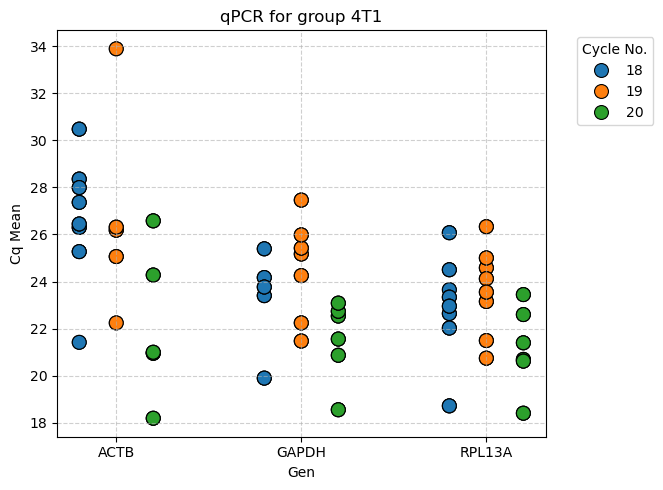

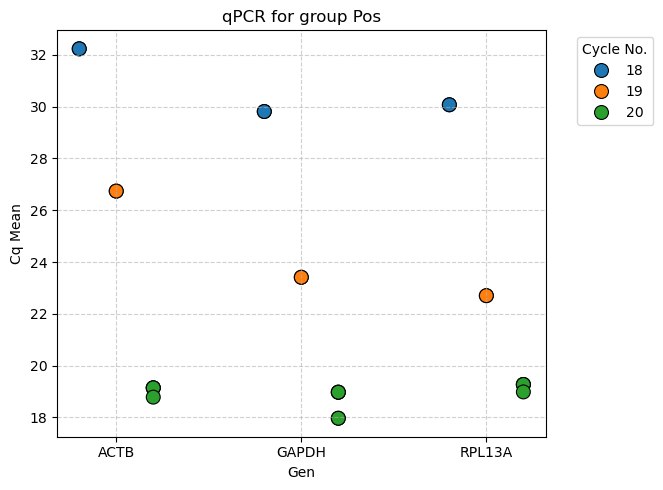

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load data
combined_df = pd.read_excel('Porównanie liczby cykli.xlsx')

# Assign groups based on Sample and Content
def assign_group(row):
    sample = str(row['Sample']) if pd.notna(row['Sample']) else ''
    content = str(row['Content']) if pd.notna(row['Content']) else ''
    
    if '4T1' in sample or '4T1' in content:
        return '4T1'
    elif 'Pos' in sample or 'Pos' in content:
        return 'Pos'
    elif 'NTC' in sample or 'NTC' in content:
        return 'NTC'
    else:
        return 'Inne'

combined_df['Group'] = combined_df.apply(assign_group, axis=1)

# Filter relevant data
filtered_df = combined_df[
    (combined_df['Group'].isin(['4T1', 'Pos'])) &
    (combined_df['Target'].isin(['ACTB', 'GAPDH', 'RPL13A'])) &
    ~( (combined_df['Sample'] == '4T1_6') & (combined_df['Cycle No.'] == 20) ) &
    (combined_df['Cq Mean'] > 0) & 
    (combined_df['Cq Mean'] <= 35)
].copy()

# Set gene order
target_order = ['ACTB', 'GAPDH', 'RPL13A']
target_mapping = {target: i for i, target in enumerate(target_order)}
filtered_df['Target_Pos'] = filtered_df['Target'].map(target_mapping)

# Apply jitter based on cycle number (e.g., 18 = -0.2, 19 = 0, 20 = +0.2)
cycle_offset = {18: -0.2, 19: 0.0, 20: 0.2}
filtered_df['Offset'] = filtered_df['Cycle No.'].map(cycle_offset)

# X position = gene index + jitter based on cycle number
filtered_df['X'] = filtered_df['Target_Pos'] + filtered_df['Offset']

# Colors for cycles
cycle_palette = {18: '#1f77b4', 19: '#ff7f0e', 20: '#2ca02c'}

# Generate separate plots for each group
for group_name in ['4T1', 'Pos']:
    group_data = filtered_df[filtered_df['Group'] == group_name]
    
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        data=group_data,
        x='X',
        y='Cq Mean',
        hue='Cycle No.',
        palette=cycle_palette,
        s=100,
        edgecolor='black'
    )
    
    plt.xticks(
        ticks=range(len(target_order)),
        labels=target_order
    )
    plt.xlabel('Gen')
    plt.ylabel('Cq Mean')
    plt.title(f'qPCR for group {group_name}')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(title='Cycle No.', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    #plt.savefig(f'qPCR_cycle_gen_comparison_{group_name}_without_4T1_6.png')
    plt.show()